# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [163]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [164]:
#weather_api_key


In [165]:
#save config info
#url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
units = "metric"

#build query url
#query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [166]:
#print(query_url)

### Generate the Cities List by Using the `citipy` Library

In [167]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


In [168]:
print(cities)

['fort mcmurray', 'olinda', 'college', 'wa', 'ancud', 'bredasdorp', 'port-aux-francais', 'bang saphan', 'nikolayevsk-on-amure', 'avarua', 'gadzhiyevo', 'yellowknife', 'blackmans bay', 'adamstown', 'port alfred', 'port elizabeth', 'puerto leguizamo', 'james island', 'talnakh', 'montagu', 'along', 'port mathurin', 'cidreira', 'nainpur', 'pacific grove', "nuku'alofa", 'ushuaia', 'am djarass', 'waitangi', 'puerto san carlos', 'papatowai', 'bengkulu', 'januaria', 'coquimbo', 'san antonio de pale', 'petropavlovsk-kamchatsky', 'iqaluit', 'enewetak', 'stanley', 'el granada', 'jamestown', 'udachny', 'puerto ayora', 'qaqortoq', 'afaahiti', 'dudinka', 'kirakira', 'yanchep', 'muntok', 'aileu', 'edinburgh of the seven seas', 'kodiak', 'whitehorse', 'christchurch', 'an nuhud', 'targu carbunesti', 'nema', 'hasaki', 'dryden', 'constantia', 'anadyr', 'alpine', 'fonte boa', 'cargados carajos', 'albany', 'asau', 'arraial do cabo', 'aasiaat', 'challapata', 'remire-montjoly', 'mundybash', 'chonchi', 'vorga

In [169]:


response = requests.get(query_url).json()
print(json.dumps(response, indent=4, sort_keys=True))



{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": -45.5882,
        "lon": -69.07
    },
    "dt": 1684704801,
    "id": 3835710,
    "main": {
        "feels_like": 2.75,
        "grnd_level": 968,
        "humidity": 41,
        "pressure": 1001,
        "sea_level": 1001,
        "temp": 8.06,
        "temp_max": 8.06,
        "temp_min": 8.06
    },
    "name": "Sarmiento",
    "sys": {
        "country": "AR",
        "sunrise": 1684670137,
        "sunset": 1684703423
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 266,
        "gust": 20.3,
        "speed": 14.55
    }
}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [170]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
# url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
 # Parse the JSON and retrieve data
        response = requests.get(query_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fort mcmurray
Processing Record 2 of Set 1 | olinda
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | wa
City not found. Skipping...
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | bang saphan
Processing Record 9 of Set 1 | nikolayevsk-on-amure
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | gadzhiyevo
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | puerto leguizamo
Processing Record 18 of Set 1 | james island
City not found. Skipping...
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | montagu
Processing Record 21 of Se

In [171]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [172]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fort mcmurray,56.7268,-111.3810,23.77,40,100,3.09,CA,1684705377
1,olinda,-8.0089,-34.8553,25.85,83,75,2.57,BR,1684705378
2,college,64.8569,-147.8028,20.05,39,40,2.57,US,1684705188
3,ancud,-41.8697,-73.8203,7.16,90,100,1.50,CL,1684705379
4,bredasdorp,-34.5322,20.0403,11.10,65,100,1.75,ZA,1684705379


In [173]:
import os

# Create the output_data directory if it doesn't exist
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [174]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort mcmurray,56.7268,-111.3810,23.77,40,100,3.09,CA,1684705377
1,olinda,-8.0089,-34.8553,25.85,83,75,2.57,BR,1684705378
2,college,64.8569,-147.8028,20.05,39,40,2.57,US,1684705188
3,ancud,-41.8697,-73.8203,7.16,90,100,1.50,CL,1684705379
4,bredasdorp,-34.5322,20.0403,11.10,65,100,1.75,ZA,1684705379


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

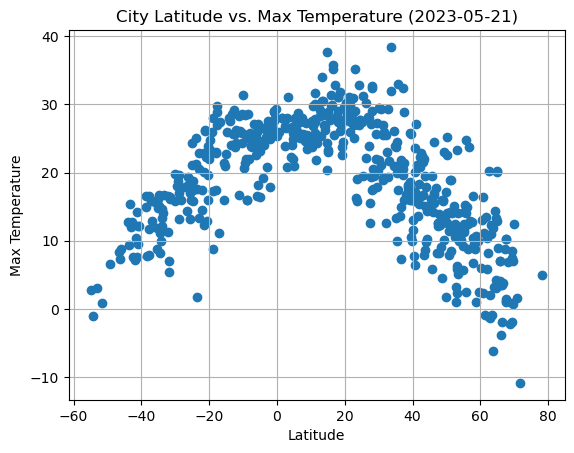

<Figure size 640x480 with 0 Axes>

In [175]:
# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime("%Y-%m-%d"))
plt.grid(True)


# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

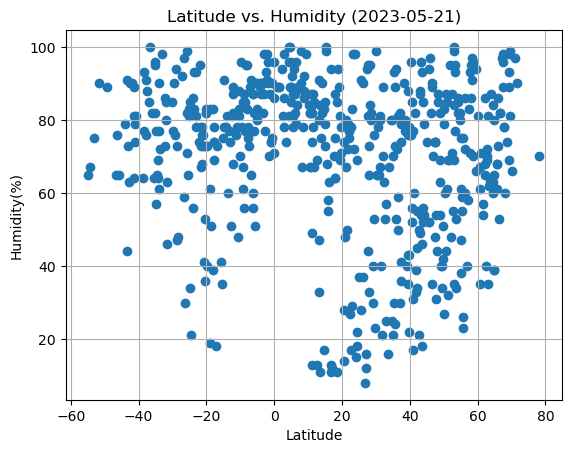

<Figure size 640x480 with 0 Axes>

In [176]:

plt.title('Latitude vs. Humidity (%s)' % time.strftime("%Y-%m-%d"))
plt.grid(True)


# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

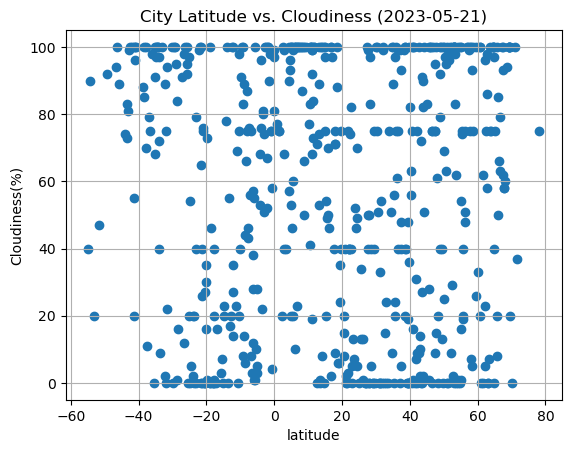

<Figure size 640x480 with 0 Axes>

In [177]:


plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime("%Y-%m-%d"))
plt.grid(True)

# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('latitude')
plt.ylabel('Cloudiness(%)')
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

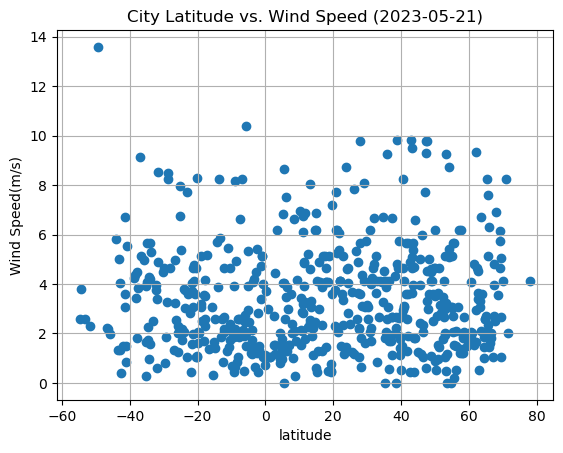

<Figure size 640x480 with 0 Axes>

In [178]:
# Build the scatter plots for latitude vs. wind speed
plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime("%Y-%m-%d"))
plt.grid(True)

# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('latitude')
plt.ylabel('Wind Speed(m/s)')
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [179]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

In [180]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort mcmurray,56.7268,-111.3810,23.77,40,100,3.09,CA,1684705377
2,college,64.8569,-147.8028,20.05,39,40,2.57,US,1684705188
6,bang saphan,11.2126,99.5117,25.84,84,99,2.84,TH,1684705380
7,nikolayevsk-on-amure,53.1406,140.7300,6.24,84,100,2.00,RU,1684705380
9,gadzhiyevo,69.2551,33.3362,7.50,93,100,6.14,RU,1684705381


In [181]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]  < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olinda,-8.0089,-34.8553,25.85,83,75,2.57,BR,1684705378
3,ancud,-41.8697,-73.8203,7.16,90,100,1.50,CL,1684705379
4,bredasdorp,-34.5322,20.0403,11.10,65,100,1.75,ZA,1684705379
5,port-aux-francais,-49.3500,70.2167,6.62,89,92,13.59,TF,1684705380
8,avarua,-21.2078,-159.7750,26.03,78,40,4.63,CK,1684705381


###  Temperature vs. Latitude Linear Regression Plot

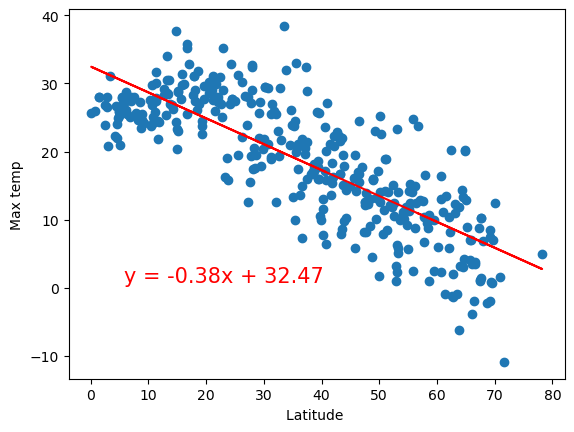

The r-squared is: 0.6498863181268784


In [204]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ['Lat'] 
y_values = northern_hemi_df ['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create_linear_regression_plot(x_values, y_values, "Latitude", "Max Temperature", "Northern")
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Latitude ')
plt.ylabel('Max temp')
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
#Discussion about the linear relationship: Overall, an r-squared value of 0.6499 indicates a moderate positive correlation between 
#latitude and maximum temperature in the Northern Hemisphere.

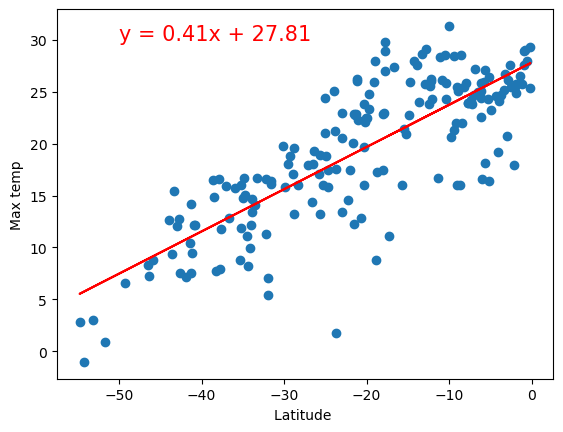

The r-squared is: 0.6530277813413345


In [202]:
# Linear regression on Southern Hemisphere
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Linear regression on Northern Hemisphere
x_values = southern_hemi_df ['Lat'] 
y_values = southern_hemi_df ['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create_linear_regression_plot(x_values, y_values, "Latitude", "Max Temperature", "Northern")
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

plt.xlabel('Latitude ')
plt.ylabel('Max temp')
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
#Discussion about the linear relationship: Since the R-squared value ranges from 0 to 1, a value of 0.653 suggests a moderate 
#level of correlation between Latitude and Max Temperature in the Southern Hemisphere. 
#This means that there is a tendency for Max Temperature to decrease as 
#Latitude moves towards the South


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

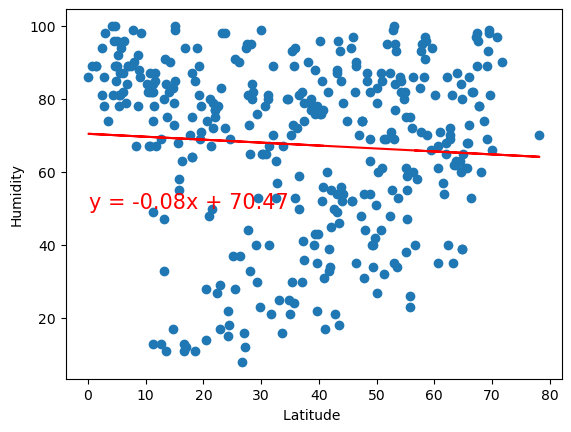

The r-squared is: 0.004645764612872593


In [221]:
# Northern Hemisphere

# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ['Lat'] 
y_values = northern_hemi_df ['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create_linear_regression_plot(x_values, y_values, "Latitude", "Max Temperature", "Northern")
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.1,50),fontsize=15,color="red")

plt.xlabel('Latitude ')
plt.ylabel('Humidity')
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
# Discussion about the linear relationship:The r-squared value of 0.004645764612872593 indicates a 
very weak correlation between the variables being compared

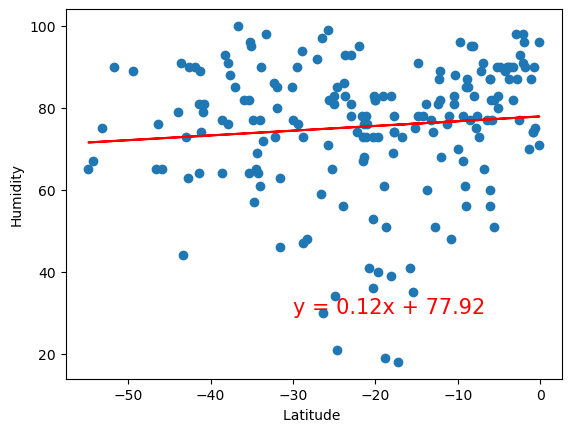

The r-squared is: 0.00963787832857903


In [220]:
# Southern Hemisphere

# Linear regression on Northern Hemisphere
x_values = southern_hemi_df ['Lat'] 
y_values = southern_hemi_df ['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create_linear_regression_plot(x_values, y_values, "Latitude", "Max Temperature", "Northern")
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

plt.xlabel('Latitude ')
plt.ylabel('Humidity')
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
# Discussion about the linear relationship: The r-squared value of 0.00963787832857903 indicates a very weak correlation

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

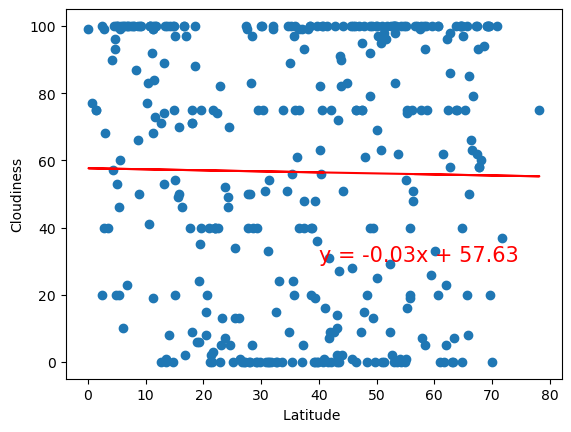

The r-squared is: 0.00024307681825659521


In [219]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ['Lat'] 
y_values = northern_hemi_df ['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create_linear_regression_plot(x_values, y_values, "Latitude", "Max Temperature", "Northern")
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

plt.xlabel('Latitude ')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-squared is: {rvalue**2}")

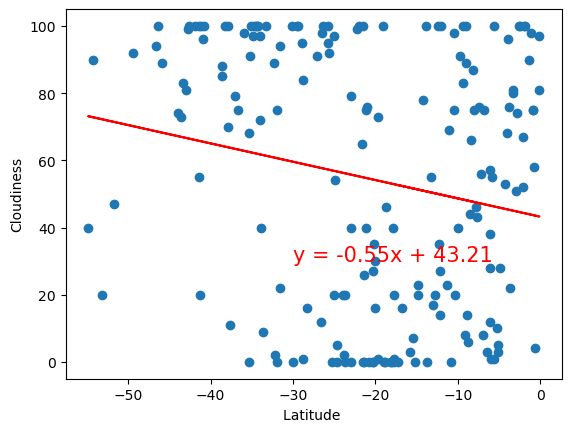

The r-squared is: 0.03847697639686053


In [218]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df ['Lat'] 
y_values = southern_hemi_df ['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create_linear_regression_plot(x_values, y_values, "Latitude", "Max Temperature", "Northern")
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

plt.xlabel('Latitude ')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


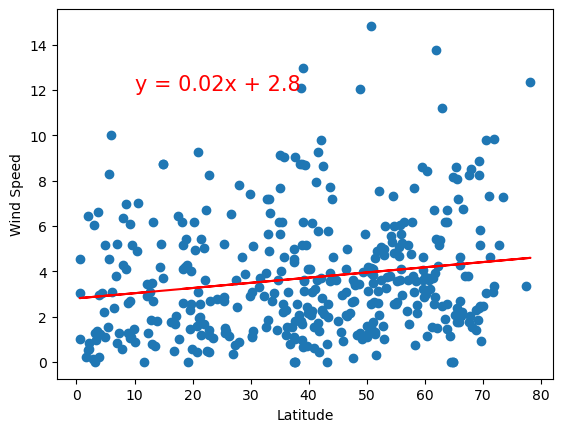

In [21]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ['Lat'] 
y_values = northern_hemi_df ['Wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create_linear_regression_plot(x_values, y_values, "Latitude", "Max Temperature", "Northern")
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

plt.xlabel('Latitude ')
plt.ylabel('Wind')
plt.show()
print(f"The r-squared is: {rvalue**2}")


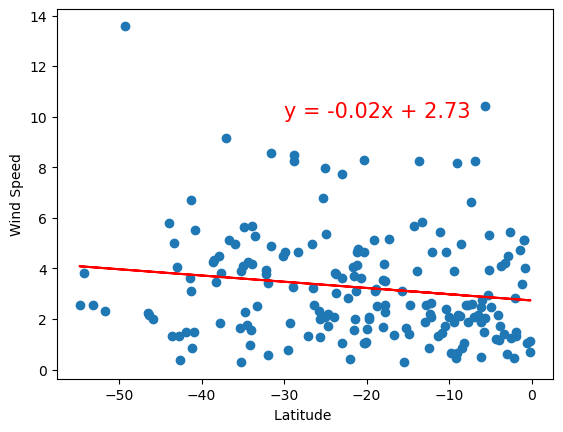

The r-squared is: 0.02477699140327353


In [225]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df ['Lat'] 
y_values = southern_hemi_df ['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create_linear_regression_plot(x_values, y_values, "Latitude", "Max Temperature", "Northern")
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

plt.xlabel('Latitude ')
plt.ylabel('Wind Speed')
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
# Discussion about the linear relationship:
#The r-squared value of 0.02477699140327353 for the relationship between latitude and wind speed
#in the Southern Hemisphere indicates a very weak correlation

**Discussion about the linear relationship:** YOUR RESPONSE HERE